## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
ship = pd.read_excel('titanic.xlsx')

### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [3]:
ship.shape

(1309, 14)

In [ ]:
#There are 14 columns, 1309 rows to start with

In [4]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
# categorical variables: pclass, survived, sex, ticket, cabin, boat, body, embarked,home dest
# numeric variables: age, sibsp, parch,fare
# outside: name
# dependent variable: survived?

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [6]:
ship.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
#missing data in age, cabin, embarked, boat, body, home deatination. 
# cabin and body have the most data missing
# fare and embarked has the least missing data (of those with missing data)

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [7]:
ship_original = ship.copy()

In [8]:
# remove cabin, boat, body, home.dest columns 
ship.drop(columns = ["cabin","boat","body","home.dest"],inplace=True)

In [9]:
#most common point of embarkation point
ship["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [11]:
#fill missing embarkation point with S
ship["embarked"].fillna("S", inplace = True)

In [12]:
# file missing fare values with average fare
ship["fare"].fillna(ship["fare"].mean(),inplace = True)

In [13]:
#remove rows with missing age data
ship.dropna(subset=["age"],inplace = True)
ship.reset_index(drop=True,inplace= True)

In [14]:
ship.loc[ship.isnull().any (axis=1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked


In [ ]:
#No missing data

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [15]:
#Change labels for categorical columns: pclass, survived, embarked
ship.loc[ship["pclass"]== 1,"pclass"]= "First Class"
ship.loc[ship["pclass"]== 2,"pclass"]= "Second Class"
ship.loc[ship["pclass"]== 3,"pclass"]= "Third Class"

In [20]:
#Create a new column called "Titanic Passenger" and make all values 1
ship["Titantic Passenger"]= 1

In [21]:
#Create a new column called "Family Size" - this column should equal the total number of family members 
#each passenger was traveling with.
ship["Family Size"]= ship["sibsp"]+ ship["parch"]
ship.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size
0,First Class,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,0
1,First Class,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,3
2,First Class,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,1,3


In [22]:
#Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, 
#and 0 if the passenger was traveling with family.
ship["Travel Alone"]= np.where(ship["Family Size"]==0,1,0)
ship.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone
0,First Class,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,0,1
1,First Class,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,3,0


In [23]:
#Create a column called "Has Caregiver" - this column should have a value of 1 if a 
#passenger is less than 13-years old AND the passenger is traveling with at 
#least one family member, otherwise the value should be 0.
ship["Has Caregiver"]=np.where(((ship["age"]<13)& (ship["Family Size"])>0),1,0)
ship.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone,Has Caregiver
0,First Class,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,0,1,0
1,First Class,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,3,0,1
2,First Class,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,1,3,0,1
3,First Class,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,3,0,0


In [24]:
#Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars 
#for their ticket, and 0 otherwise.
ship["Crew"]=np.where (ship["fare"]==0,1,0)

In [25]:
ship.loc[ship["fare"]==0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
7,First Class,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S,1,0,1,0,1
133,First Class,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,1,0,1,0,1
150,First Class,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,S,1,0,1,0,1
207,First Class,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,1,0,1,0,1
800,Third Class,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,1,0,1,0,1
802,Third Class,0,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,1,0,1,0,1
839,Third Class,0,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,1,0,1,0,1
1004,Third Class,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,1,0,1,0,1


In [26]:
#Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). 
#You can use bins to complete this (or any other method you like). 
#You define the cutoff points for each group you create.
#infant: 0-1
#child: 2-12
#teen: 13-21
#adult: 22-65
#senior: 66+
conditions = [(ship["age"]<=1),
              (ship["age"]<=12),
              (ship["age"]<= 21),
              (ship["age"]<=65)]
outcomes = ["Infant", "Child","Teen","Adult"]
ship["Age Group"]= np.select(conditions,outcomes,default = "Senior")

In [27]:
ship.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,First Class,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,0,1,0,0,Adult
1,First Class,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,3,0,1,0,Infant
2,First Class,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,1,3,0,1,0,Child
3,First Class,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,3,0,0,0,Adult
4,First Class,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,1,3,0,0,0,Adult


In [29]:
#After creating new columns, replace the basic coding "0/1" with meaningful labels.
ship.loc[ship["survived"]==1,"survived"] = "Survived"
ship.loc[ship["survived"]==0,"survived"] = "Did not survive"
ship.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
1041,Third Class,Did not survive,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,C,1,0,1,0,0,Adult
1042,Third Class,Did not survive,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C,1,1,0,0,0,Teen
1043,Third Class,Did not survive,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,C,1,0,1,0,0,Adult
1044,Third Class,Did not survive,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,C,1,0,1,0,0,Adult
1045,Third Class,Did not survive,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S,1,0,1,0,0,Adult


In [30]:
ship["embarked"].replace (["S","C","Q"],["Southampton","Cherbourg","Queenstown"],inplace=True)
ship.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
1041,Third Class,Did not survive,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,Cherbourg,1,0,1,0,0,Adult
1042,Third Class,Did not survive,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,Cherbourg,1,1,0,0,0,Teen
1043,Third Class,Did not survive,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,Cherbourg,1,0,1,0,0,Adult
1044,Third Class,Did not survive,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,Cherbourg,1,0,1,0,0,Adult
1045,Third Class,Did not survive,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,Southampton,1,0,1,0,0,Adult


In [45]:
ship.loc[ship["Travel Alone"]==1,"Travel Alone"] = "Solo traveler"
ship.loc[ship["Travel Alone"]==0,"Travel Alone"] = "Not solo"
ship.loc[ship["Has Caregiver"]==0,"Has Caregiver"] = "No Caregiver"
ship.loc[ship["Has Caregiver"]==1,"Has Caregiver"] = "Caregiver"

In [46]:
ship.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titantic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,First Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Solo traveler,No Caregiver,0,Adult
1,First Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,Not solo,Caregiver,0,Infant
2,First Class,Did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,Not solo,Caregiver,0,Child
3,First Class,Did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,Not solo,No Caregiver,0,Adult
4,First Class,Did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,Not solo,No Caregiver,0,Adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [31]:
ship["pclass"].value_counts()

Third Class     501
First Class     284
Second Class    261
Name: pclass, dtype: int64

In [32]:
ship["survived"].value_counts()

Did not survive    619
Survived           427
Name: survived, dtype: int64

In [33]:
ship["sex"].value_counts()

male      658
female    388
Name: sex, dtype: int64

In [34]:
ship["age"].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.6667      1
20.5000     1
23.5000     1
24.5000     1
60.5000     1
Name: age, Length: 98, dtype: int64

In [35]:
ship["sibsp"].value_counts()

0    685
1    280
2     36
4     22
3     16
5      6
8      1
Name: sibsp, dtype: int64

In [36]:
ship["parch"].value_counts()

0    768
1    160
2     97
3      8
5      6
4      5
6      2
Name: parch, dtype: int64

In [37]:
ship["embarked"].value_counts()

Southampton    784
Cherbourg      212
Queenstown      50
Name: embarked, dtype: int64

In [38]:
ship["Titantic Passenger"].value_counts()

1    1046
Name: Titantic Passenger, dtype: int64

In [39]:
ship["Crew"].value_counts() #only 8 crew?

0    1038
1       8
Name: Crew, dtype: int64

In [43]:
ship["Travel Alone"].value_counts()

Solo traveler    590
Not solo         456
Name: Travel Alone, dtype: int64

In [47]:
ship["Has Caregiver"].value_counts()

No Caregiver    1006
Caregiver         40
Name: Has Caregiver, dtype: int64

In [48]:
ship["Age Group"].value_counts()

Adult     746
Teen      196
Child      72
Infant     22
Senior     10
Name: Age Group, dtype: int64

In [49]:
ship["Family Size"].value_counts()

0     590
1     206
2     144
3      39
5      25
4      17
6      16
7       8
10      1
Name: Family Size, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [76]:
print (" The average age is ", ship["age"].mean()) 
print (" The median is ", ship["age"].median()) 
print (" The mode age is ", ship["age"].mode()) 
print (" The standard deviation of age is ", ship["age"].std()) 
print (" The range of age is ", ship["age"].max() - ship["age"].min())

 The average age is  29.8811345124283
 The median is  28.0
 The mode age is  0    24.0
dtype: float64
 The standard deviation of age is  14.413499699923594
 The range of age is  79.8333


In [77]:
ship["age"].groupby (ship["survived"]).median() # Age does not seem to have had an impact

survived
Did not survive    28.0
Survived           28.0
Name: age, dtype: float64

In [78]:
ship["age"].groupby (ship["survived"]).mean() # Age does not seem to have had an impact

survived
Did not survive    30.545369
Survived           28.918228
Name: age, dtype: float64

In [79]:
print (" The average number of siblings is ", ship["sibsp"].mean()) 
print (" The median is ", ship["sibsp"].median()) 
print (" The mode  is ", ship["sibsp"].mode()) 
print (" The standard deviation  is ", ship["sibsp"].std()) 
print (" The range is ", ship["sibsp"].max() - ship["sibsp"].min())

 The average number of siblings is  0.502868068833652
 The median is  0.0
 The mode  is  0    0
dtype: int64
 The standard deviation  is  0.912167299664662
 The range is  8


In [80]:
pd.crosstab(ship["survived"],ship["sibsp"]) #The fewer siblings, the better survival rate

sibsp,0,1,2,3,4,5,8
survived,,,,,,,
Did not survive,430,133,20,10,19,6,1
Survived,255,147,16,6,3,0,0


In [81]:
print (" The average fare is ", ship["fare"].mean()) 
print (" The median is ", ship["fare"].median()) 
print (" The mode is ", ship["fare"].mode()) 
print (" The standard deviation  is ", ship["fare"].std()) 
print (" The range is ", ship["fare"].max() - ship["fare"].min())

 The average fare is  36.68283879472418
 The median is  15.8
 The mode is  0    13.0
dtype: float64
 The standard deviation  is  55.70595916349577
 The range is  512.3292


In [82]:
pd.crosstab(ship["survived"],ship["pclass"]) #Pclass and fare would be related. More first class passengers survived.

pclass,First Class,Second Class,Third Class
survived,,,
Did not survive,103,146,370
Survived,181,115,131


In [83]:
pd.crosstab(ship["survived"],ship["Travel Alone"]) #More solo travelers died than those traveling with others

Travel Alone,Not solo,Solo traveler
survived,,
Did not survive,217,402
Survived,239,188


In [84]:
pd.crosstab(ship["survived"],ship["Has Caregiver"])

Has Caregiver,Caregiver,No Caregiver
survived,,
Did not survive,18,601
Survived,22,405


In [85]:
pd.crosstab(ship["survived"],ship["parch"]) #Parents with children. 

parch,0,1,2,3,4,5,6
survived,,,,,,,
Did not survive,498,65,42,3,4,5,2
Survived,270,95,55,5,1,1,0


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [96]:
#pclass: how many survivors are in each passenger class? 
#    does a pattern emerge? which class has the most survivors? which has the least?
pd.crosstab(ship["pclass"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
pclass,,,
First Class,103,181,284
Second Class,146,115,261
Third Class,370,131,501
All,619,427,1046


In [95]:
#pclass: how many survivors are in each passenger class? 
#    does a pattern emerge? which class has the most survivors? which has the least?
pd.crosstab(ship["pclass"],ship["survived"],normalize = 'index',margins=True)

survived,Did not survive,Survived
pclass,,
First Class,0.362676,0.637324
Second Class,0.559387,0.440613
Third Class,0.738523,0.261477
All,0.591778,0.408222


In [100]:
#The lower the class, the lower the survivor rate. First class has the most survivors. In percentages, the Third Class
# lost the greater number of passengers, while First Class has the highest percentage of survivors.

In [94]:
#sex: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?
pd.crosstab(ship["sex"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
sex,,,
female,96,292,388
male,523,135,658
All,619,427,1046


In [103]:
# pclass: how many survivors are in each passenger class? 
#    does a pattern emerge? which class has the most survivors? which has the least?
pd.crosstab(ship["sex"],ship["survived"],normalize = 'index',margins=True)

survived,Did not survive,Survived
sex,,
female,0.247423,0.752577
male,0.794833,0.205167
All,0.591778,0.408222


In [101]:
##In this case, more males did not survive (by percentage) than females. But the number of males on board was almost
## two to one as related to females.

In [99]:
#age: how does the average age of the passenger differ based on survival group?
print (" The average age is ", ship["age"].mean())
ship["age"].groupby (ship["survived"]).mean()

 The average age is  29.8811345124283


survived
Did not survive    30.545369
Survived           28.918228
Name: age, dtype: float64

In [104]:
## Average age does not seem to have an impact on survival rate

In [108]:
#age group: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? 
#which has the least?
pd.crosstab(ship["Age Group"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
Age Group,,,
Adult,446,300,746
Child,35,37,72
Infant,5,17,22
Senior,8,2,10
Teen,125,71,196
All,619,427,1046


In [106]:
pd.crosstab(ship["Age Group"],ship["survived"],normalize = 'index',margins=True)

survived,Did not survive,Survived
Age Group,,
Adult,0.597855,0.402145
Child,0.486111,0.513889
Infant,0.227273,0.772727
Senior,0.800000,0.200000
Teen,0.637755,0.362245
All,0.591778,0.408222


In [ ]:
## Nearly all the seniors did not survive; the younger the better odds of surviving. Certainly there were 
## fewer younger passengers and they were the first in the lifeboats

In [109]:
#family size: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?
pd.crosstab(ship["Family Size"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
Family Size,,,
0,402,188,590
1,93,113,206
2,63,81,144
3,9,30,39
4,11,6,17
5,20,5,25
6,12,4,16
7,8,0,8
10,1,0,1


In [110]:
pd.crosstab(ship["Family Size"],ship["survived"],normalize = 'index',margins=True)

survived,Did not survive,Survived
Family Size,,
0,0.681356,0.318644
1,0.451456,0.548544
2,0.437500,0.562500
3,0.230769,0.769231
4,0.647059,0.352941
5,0.800000,0.200000
6,0.750000,0.250000
7,1.000000,0.000000
10,1.000000,0.000000


In [ ]:
## The survival rate was highest in families with 3 members(77%) (with 1 or 2 just above 50%)

In [111]:
#travel alone: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? 
#which has the least?
pd.crosstab(ship["Travel Alone"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
Travel Alone,,,
Not solo,217,239,456
Solo traveler,402,188,590
All,619,427,1046


In [113]:
pd.crosstab(ship["Travel Alone"],ship["survived"],normalize='index',margins=True)

survived,Did not survive,Survived
Travel Alone,,
Not solo,0.475877,0.524123
Solo traveler,0.681356,0.318644
All,0.591778,0.408222


In [ ]:
## Solo travelers had higher survival rates. Just looking at total numbers is misleading.

In [ ]:
#crew: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?

In [114]:
pd.crosstab(ship["Crew"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
Crew,,,
0,613,425,1038
1,6,2,8
All,619,427,1046


In [ ]:
## I ended up with only 8 crew members listed.  I must have deleted too many rows in that category.

In [116]:
#has caregiver: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?
pd.crosstab(ship["Has Caregiver"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
Has Caregiver,,,
Caregiver,18,22,40
No Caregiver,601,405,1006
All,619,427,1046


In [119]:
pd.crosstab(ship["Has Caregiver"],ship["survived"],normalize = 'index',margins=True)

survived,Did not survive,Survived
Has Caregiver,,
Caregiver,0.450000,0.550000
No Caregiver,0.597416,0.402584
All,0.591778,0.408222


In [ ]:
##Those with a caregiver had better survival rates than those without. Unaccompanied children fared worse than others.

In [120]:
#fare: how does the average fare the passenger paid differ based on survival group?
print (" The average fare is ", ship["fare"].mean())
ship["fare"].groupby (ship["survived"]).mean()

 The average fare is  36.68283879472418


survived
Did not survive    25.161913
Survived           53.384134
Name: fare, dtype: float64

In [ ]:
## Those who paid a fare above the average had a better survival rate; these, of course, were the First Class passengers

In [122]:
#embarked: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?
pd.crosstab(ship["embarked"],ship["survived"],margins=True)

survived,Did not survive,Survived,All
embarked,,,
Cherbourg,80,132,212
Queenstown,37,13,50
Southampton,502,282,784
All,619,427,1046


In [123]:
pd.crosstab(ship["embarked"],ship["survived"],normalize = 'index',margins=True)

survived,Did not survive,Survived
embarked,,
Cherbourg,0.377358,0.622642
Queenstown,0.740000,0.260000
Southampton,0.640306,0.359694
All,0.591778,0.408222


In [ ]:
## Again, by percentages, those who boarded in Cherbourg had the highest survival rate, Queenstown the lowest.

### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

<AxesSubplot:xlabel='pclass', ylabel='Count'>

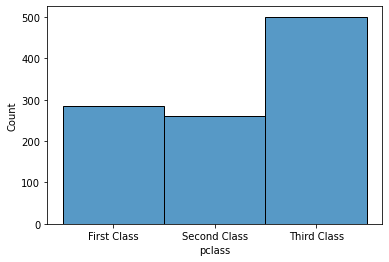

In [126]:
sns.histplot(ship["pclass"],kde = False)

<AxesSubplot:xlabel='Age Group', ylabel='Count'>

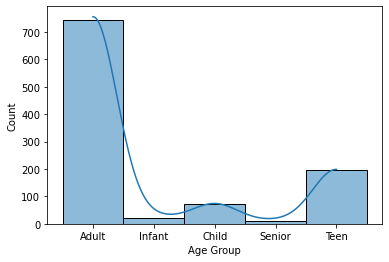

In [129]:
sns.histplot(ship["Age Group"],kde = True)

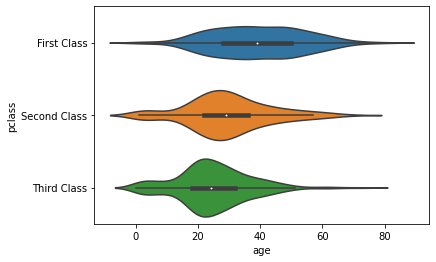

In [180]:
sns.violinplot(x = ship["age"], y = ship["pclass"])
plt.show()